In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/san/Documentos/simulacion/cars.csv', sep=';',quotechar='"',dtype={'Origin':'category'})

In [3]:
df.head(4)

Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0       130.0   
1          Buick Skylark 320  15.0          8         350.0       165.0   
2         Plymouth Satellite  18.0          8         318.0       150.0   
3              AMC Rebel SST  16.0          8         304.0       150.0   

   Weight  Acceleration  Model Origin  
0  3504.0          12.0     70     US  
1  3693.0          11.5     70     US  
2  3436.0          11.0     70     US  
3  3433.0          12.0     70     US

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Car           406 non-null    object  
 1   MPG           406 non-null    float64 
 2   Cylinders     406 non-null    int64   
 3   Displacement  406 non-null    float64 
 4   Horsepower    406 non-null    float64 
 5   Weight        406 non-null    float64 
 6   Acceleration  406 non-null    float64 
 7   Model         406 non-null    int64   
 8   Origin        406 non-null    category
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 26.0+ KB


In [5]:
# Obtener la fecuencia absoluta como una serie de datos
x = df['Origin'].value_counts()

In [6]:
x

US        254
Japan      79
Europe     73
Name: Origin, dtype: int64

In [7]:
# Transformo los datos a un data frame
x = df['Origin'].value_counts().to_frame()

In [8]:
x

Origin
US         254
Japan       79
Europe      73

In [9]:
total = x['Origin'].sum()

In [10]:
def freq_relative(x):
    return x/total

In [11]:
def angulo(x):
    return freq_relative(x)*360

In [12]:
total

406

In [13]:
freq_relative(x['Origin'])

US        0.625616
Japan     0.194581
Europe    0.179803
Name: Origin, dtype: float64

In [14]:
x

Origin
US         254
Japan       79
Europe      73

In [15]:
# Creame una nueva columna que se llame asi y sea de acuerdo al origen
x = x.assign(freq_relative=freq_relative(x['Origin']))

In [16]:
x

Origin  freq_relative
US         254       0.625616
Japan       79       0.194581
Europe      73       0.179803

In [17]:
x = x.assign(angulo=angulo(x['Origin']))

In [18]:
x

Origin  freq_relative      angulo
US         254       0.625616  225.221675
Japan       79       0.194581   70.049261
Europe      73       0.179803   64.729064

In [19]:
x.sum()

Origin           406.0
freq_relative      1.0
angulo           360.0
dtype: float64

In [20]:
# Permite ver la media, mediana
x.describe()

Origin  freq_relative      angulo
count    3.000000       3.000000    3.000000
mean   135.333333       0.333333  120.000000
std    102.812126       0.253232   91.163462
min     73.000000       0.179803   64.729064
25%     76.000000       0.187192   67.389163
50%     79.000000       0.194581   70.049261
75%    166.500000       0.410099  147.635468
max    254.000000       0.625616  225.221675

In [21]:
europe = df.groupby('Origin').get_group('Europe')

In [22]:
europe.head(3)

Car   MPG  Cylinders  Displacement  Horsepower  \
10          Citroen DS-21 Pallas   0.0          4         133.0       115.0   
25  Volkswagen 1131 Deluxe Sedan  26.0          4          97.0        46.0   
26                   Peugeot 504  25.0          4         110.0        87.0   

    Weight  Acceleration  Model  Origin  
10  3090.0          17.5     70  Europe  
25  1835.0          20.5     70  Europe  
26  2672.0          17.5     70  Europe

In [23]:
europe.sort_values("Horsepower",axis=0, ascending = True,
inplace= False, na_position = 'last')

Car   MPG  Cylinders  Displacement  Horsepower  \
361                   Renault 18i  34.5          4         100.0         0.0   
337          Renault Lecar Deluxe  40.9          4          85.0         0.0   
25   Volkswagen 1131 Deluxe Sedan  26.0          4          97.0        46.0   
109       Volkswagen Super Beetle  26.0          4          97.0        46.0   
332  Volkswagen Rabbit C (Diesel)  44.3          4          90.0        48.0   
..                            ...   ...        ...           ...         ...   
283                    Saab 99gle  21.6          4         121.0       115.0   
10           Citroen DS-21 Pallas   0.0          4         133.0       115.0   
218            Mercedes-Benz 280s  16.5          6         168.0       120.0   
282                   Volvo 264gl  17.0          6         163.0       125.0   
284                 Peugeot 604sl  16.2          6         163.0       133.0   

     Weight  Acceleration  Model  Origin  
361  2320.0          15.8     81  Europe  
337  1835.0          17.3     80  Europe  
25   1835.0          20.5     70  Europe  
109  1950.0          21.0     73  Europe  
332  2085.0          21.7     80  Europe  
..      ...           ...    ...     ...  
283  2795.0          15.7     78  Europe  
10   3090.0          17.5     70  Europe  
218  3820.0          16.7     76  Europe  
282  3140.0          13.6     78  Europe  
284  3410.0          15.8     78  Europe  

[73 rows x 9 columns]

In [24]:
europe.head(3)

Car   MPG  Cylinders  Displacement  Horsepower  \
10          Citroen DS-21 Pallas   0.0          4         133.0       115.0   
25  Volkswagen 1131 Deluxe Sedan  26.0          4          97.0        46.0   
26                   Peugeot 504  25.0          4         110.0        87.0   

    Weight  Acceleration  Model  Origin  
10  3090.0          17.5     70  Europe  
25  1835.0          20.5     70  Europe  
26  2672.0          17.5     70  Europe

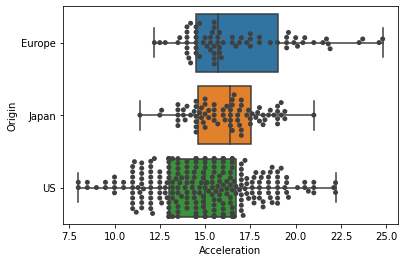

In [25]:
ax = sns.boxplot(x="Acceleration", y="Origin", data=df)
ax = sns.swarmplot(x="Acceleration", y="Origin", data=df, color=".25")

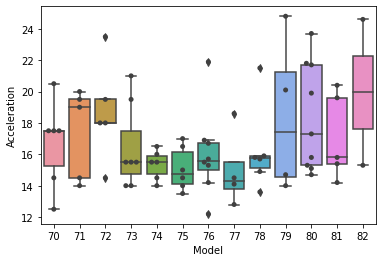

In [26]:
ax = sns.boxplot(x="Model", y="Acceleration", data=europe)
ax = sns.swarmplot(x="Model", y="Acceleration", data=europe, color=".25")

In [27]:
# select * from europe where model=72
europe72=europe.groupby('Model').get_group(72)

In [28]:
europe72

Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
66    Volkswagen Type 3  23.0          4          97.0        54.0  2254.0   
83      Volvo 145e (sw)  18.0          4         121.0       112.0  2933.0   
84  Volkswagen 411 (sw)  22.0          4         121.0        76.0  2511.0   
85     Peugeot 504 (sw)  21.0          4         120.0        87.0  2979.0   
86      Renault 12 (sw)  26.0          4          96.0        69.0  2189.0   

    Acceleration  Model  Origin  
66          23.5     72  Europe  
83          14.5     72  Europe  
84          18.0     72  Europe  
85          19.5     72  Europe  
86          18.0     72  Europe

In [29]:
europe72.describe()

MPG  Cylinders  Displacement  Horsepower       Weight  \
count   5.000000        5.0      5.000000    5.000000     5.000000   
mean   22.000000        4.0    111.000000   79.600000  2573.200000   
std     2.915476        0.0     13.247641   21.709445   369.965133   
min    18.000000        4.0     96.000000   54.000000  2189.000000   
25%    21.000000        4.0     97.000000   69.000000  2254.000000   
50%    22.000000        4.0    120.000000   76.000000  2511.000000   
75%    23.000000        4.0    121.000000   87.000000  2933.000000   
max    26.000000        4.0    121.000000  112.000000  2979.000000   

       Acceleration  Model  
count      5.000000    5.0  
mean      18.700000   72.0  
std        3.251923    0.0  
min       14.500000   72.0  
25%       18.000000   72.0  
50%       18.000000   72.0  
75%       19.500000   72.0  
max       23.500000   72.0

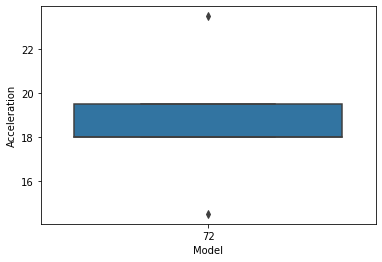

In [30]:
ax = sns.boxplot(x="Model", y="Acceleration", data=europe72)

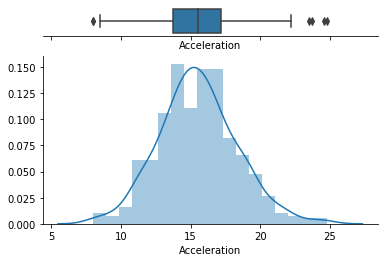

In [31]:
f, (ax_box,ax_hist) = plt.subplots(2, sharex=True,
                                  gridspec_kw={"height_ratios":(.15, .85)})
sns.boxplot(df['Acceleration'], ax=ax_box)
sns.distplot(df['Acceleration'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

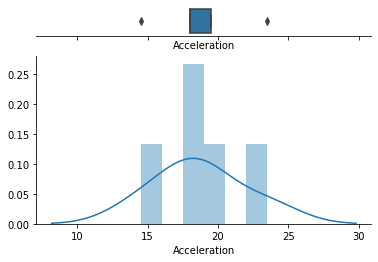

In [32]:
f, (ax_box,ax_hist) = plt.subplots(2, sharex=True,
                                  gridspec_kw={"height_ratios":(.15, .85)})
sns.boxplot(europe72['Acceleration'], ax=ax_box)
sns.distplot(europe72['Acceleration'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [33]:
europe72.describe()

MPG  Cylinders  Displacement  Horsepower       Weight  \
count   5.000000        5.0      5.000000    5.000000     5.000000   
mean   22.000000        4.0    111.000000   79.600000  2573.200000   
std     2.915476        0.0     13.247641   21.709445   369.965133   
min    18.000000        4.0     96.000000   54.000000  2189.000000   
25%    21.000000        4.0     97.000000   69.000000  2254.000000   
50%    22.000000        4.0    120.000000   76.000000  2511.000000   
75%    23.000000        4.0    121.000000   87.000000  2933.000000   
max    26.000000        4.0    121.000000  112.000000  2979.000000   

       Acceleration  Model  
count      5.000000    5.0  
mean      18.700000   72.0  
std        3.251923    0.0  
min       14.500000   72.0  
25%       18.000000   72.0  
50%       18.000000   72.0  
75%       19.500000   72.0  
max       23.500000   72.0